<a href="https://colab.research.google.com/github/gjq2yf/DS2002-FinalProject/blob/main/DataProject2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install schedule

In [11]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import sqlite3
import schedule

connection = sqlite3.connect('project2.db')
cursor = connection.cursor()

# create table 'data_table'
create_table_query = '''
    CREATE TABLE IF NOT EXISTS data_table(
        timestamp TEXT PRIMARY KEY,
        factor INT,
        pi DECIMAL
    )
'''
cursor.execute(create_table_query)

In [12]:
import time
import datetime
import schedule
import requests
import sqlite3
import pandas as pd

times = []
factors = []
pis = []
minutes = 0

# fetch data from API and insert it into data_table
def get_api_data():
    try:
        url = "https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi"
        response = requests.get(url)
        data = response.json()
        api_time, factor, pi_value = data['time'], data['factor'], data['pi']

        if api_time in times:
            return

        times.append(api_time)
        factors.append(factor)
        pis.append(pi_value)

        cursor.execute('INSERT INTO data_table (timestamp, factor, pi) VALUES (?, ?, ?)', (api_time, factor, pi_value))
        connection.commit()
        print(f"Data written to database at {api_time}")

    except Exception as e:
        print(f"There was an error fetching data from the API: {e}")

start = time.time()

while minutes < 60:
  get_api_data()
  time.sleep(60 - ((time.time() - start) % 60))
  minutes += 1

cursor.close()
connection.close()

# create a dataframe from the collected data
dataframe = pd.DataFrame({
    "timestamp": times,
    "factor": factors,
    "pi": pis
})

# save dataframe to csv
dataframe.to_csv("data_project2.csv", index=False)
print("Dataframe written to data_project2.csv")

Data written to database at 2024-05-09 23:04:02
Data written to database at 2024-05-09 23:05:02
Data written to database at 2024-05-09 23:06:02
Data written to database at 2024-05-09 23:07:02
Data written to database at 2024-05-09 23:08:02
Data written to database at 2024-05-09 23:09:02
Data written to database at 2024-05-09 23:10:02
Data written to database at 2024-05-09 23:11:02
Data written to database at 2024-05-09 23:12:02
Data written to database at 2024-05-09 23:13:02
Data written to database at 2024-05-09 23:14:02
Data written to database at 2024-05-09 23:15:02
Data written to database at 2024-05-09 23:16:02
Data written to database at 2024-05-09 23:17:02
Data written to database at 2024-05-09 23:18:02
Data written to database at 2024-05-09 23:19:02
Data written to database at 2024-05-09 23:20:02
Data written to database at 2024-05-09 23:21:02
Data written to database at 2024-05-09 23:22:02
Data written to database at 2024-05-09 23:23:02
Data written to database at 2024-05-09 2

In [13]:
dataframe.head()

,timestamp,factor,pi
0,2024-05-09 23:04:02,64,3.125969
1,2024-05-09 23:05:02,125,3.149593
2,2024-05-09 23:06:02,216,3.136963
3,2024-05-09 23:07:02,343,3.144508
4,2024-05-09 23:08:02,512,3.139640


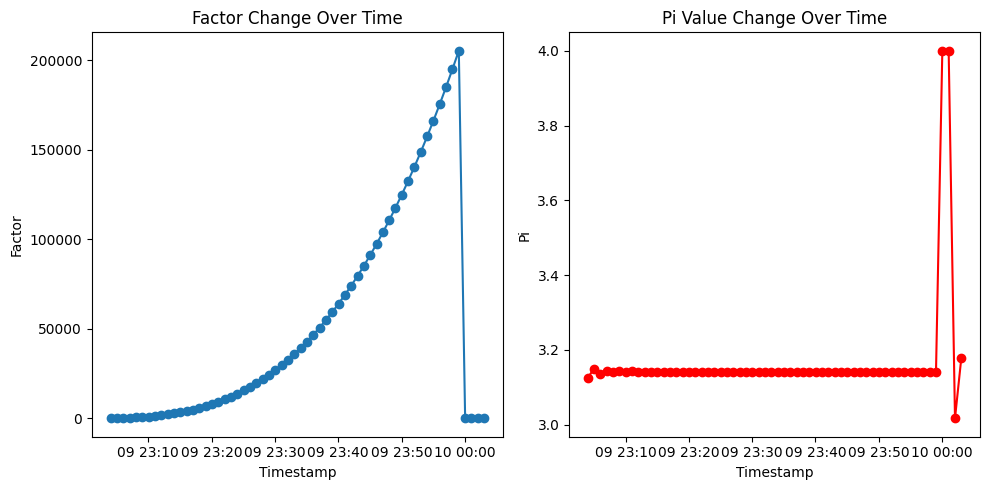

Correlation between factor and pi:
         factor      pi
factor  1.0000 -0.1521
pi     -0.1521  1.0000

Descriptive Statistics:
                            timestamp         factor         pi
count                             60      60.000000  60.000000
mean   2024-05-09 23:33:31.999999744   52215.016667   3.168573
min              2024-05-09 23:04:02       1.000000   3.017072
25%              2024-05-09 23:18:47    3217.250000   3.141561
50%              2024-05-09 23:33:32   25694.500000   3.141598
75%              2024-05-09 23:48:17   86669.250000   3.141636
max              2024-05-10 00:03:02  205379.000000   4.000000
std                              NaN   60138.943290   0.156621


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# plotting the data
plt.figure(figsize=(10, 5))

# factor plot
plt.subplot(1, 2, 1)
plt.plot(dataframe['timestamp'], dataframe['factor'], marker='o', linestyle='-')
plt.title('Factor Change Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Factor')

# pi plot
plt.subplot(1, 2, 2)
plt.plot(dataframe['timestamp'], dataframe['pi'], marker='o', linestyle='-', color='r')
plt.title('Pi Value Change Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Pi')

plt.tight_layout()
plt.show()

# calculate correlation
correlation = dataframe[['factor', 'pi']].corr()
print("Correlation between factor and pi:\n", correlation)

print("\nDescriptive Statistics:\n", dataframe.describe())

## **Documentation**
### Process + Deployment Strategy
In order to time the API call to ensure that it occured at the same time each minute and for 60 minutes, I decided to create a function, 'get_api_data', to call from the API and insert the data into a database. I then called the function within a while loop that iterated 60 times. To ensure that this was working correctly, I added a print statement after inserting into the database that ouput the exact time that data was written to the database. Lastly, I added the data to a dataframe so that it would be easy to analyze the data using visualizations as well as descriptive statistics. Additionally, within the descriptive statistics of the dataframe, we can verify that 60 values were added to the database.

### Analysis

From the first graph, which shows the change in 'factor' over time, we can see that it is an exponential function that starts at the beginning of each hour. It slowly builds up to its maximum value as time goes on and then restarts at each hour. Upon examining the correlation between 'factor' and 'pi', a weak negative correlation of -0.1521 is observed. This implies that while there is a slight tendency for 'pi' to decrease as 'factor' increases, the relationship is not significant, with time likely exerting more influence on 'factor'. The second graph, which shoes the change in 'pi' over time, shows that 'pi' mostly remains constant until 'factor' drops at which point the value fluctuates. The value of 'pi' fluctuates between 3.168573 and 4.